# Logistic regression
Some content in this notebook is adapted from the following website   
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

## Section 0.1: logit and sigmoid function
logit function and sigmoid function are inverse to each other

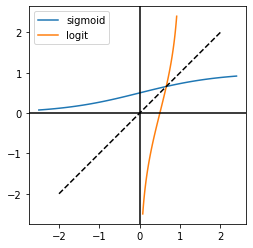

In [3]:
def logit(p):
    return np.log(p / (1 - p))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x_sig = np.arange(-2.5, 2.5, .1)
y_sig = sigmoid(x_sig)
x_logit = np.linspace(y_sig.min(), y_sig.max(), 100)
y_logit = logit(x_logit)

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

plt.plot(x_sig, y_sig, label='sigmoid')
plt.plot(x_logit, y_logit, label='logit')
plt.plot([-2, 2], [-2, 2], color='k', ls='--')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
ax.legend()

## Section 0.2: Cross-entropy function

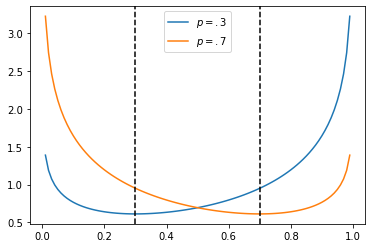

In [4]:
def CE(p, x):
    return -p * np.log(x) - (1 - p) * np.log(1 - x)

x = np.arange(0.01, 1, 0.01)
fig, ax = plt.subplots(1, 1)
y_1 = CE(.3, x)
y_2 = CE(.7, x)
ax.plot(x, y_1, label='$p=.3$')
ax.plot(x, y_2, label='$p=.7$')
ax.axvline(.3, c='k', ls='--')
ax.axvline(.7, c='k', ls='--')
ax.legend()

# Section 1. Logistic regression

In [5]:
# Load data
df = pd.read_csv('diabetes.csv')
df = df.drop('SkinThickness', axis=1)

# Get independent and dependent variable
# a categorical dependent variable is also called a label
X = df.drop('Outcome', axis=1) # explanatory variables
# Try comment the following line of normalization out 
# and see what is going to happen in model fitting
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
Y = df.Outcome # the binary (0-1) response

# Train-test split (keep 25% for test)
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=seed)
print(f'number of train examples = {len(X_train)}')
print(f'number of test examples = {len(X_test)}')
# Train model with train data
logreg = LogisticRegression(penalty='none').fit(X_train, Y_train)

number of train examples = 576
number of test examples = 192


In [6]:
# How well the model fits the tarin data
y_train_predict = logreg.predict(X_train)
# Let us first see what the prediction looks like
print(y_train_predict[:5])
# In case we need the predicted probability instead, we can do
y_train_predict_proba = logreg.predict_proba(X_train)
print(y_train_predict_proba[:5])

[0 0 0 1 1]
[[0.922543   0.077457  ]
 [0.79637449 0.20362551]
 [0.89897387 0.10102613]
 [0.19420833 0.80579167]
 [0.25182241 0.74817759]]


In [7]:
# Evaluate classification accuracy by confusion matrix
# Confusion is an n x n matrix if there are n different labels.
# In our case, the confusion matrix is going to be 2 x 2.
c_matrix = confusion_matrix(y_train_predict, Y_train)
print(c_matrix)

[[324  87]
 [ 46 119]]


In [8]:
# Let us see what the numbers mean in the confusion matrix
TP, TN, FP, FN = 0, 0, 0, 0
for tl, pl in zip(Y_train, y_train_predict):
    # tl: true label
    # pl: predicted label
    if tl == 1 and pl == 1:
        TP += 1
        continue
    if tl == 0 and pl == 0:
        TN += 1
        continue
    if tl == 0 and pl == 1:
        FP += 1
        continue
    if tl == 1 and pl == 0:
        FN += 1

print(f'true positive = {TP}')
print(f'true negative = {TN}')
print(f'false positive = {FP}')
print(f'false negative = {FN}')

# Classification accuracy is equal to (TP + TN) / (total examples)
clf_accuracy = (TP + TN) / (len(X_train))
print(f'classification accuracy (by definition) = {clf_accuracy:.5f}')

# Sklearn provide a simpler way to get classification accuracy
clf_accuracy = accuracy_score(y_train_predict, Y_train)
print(f'classification accuracy (sklearn) = {clf_accuracy:.5f}')

true positive = 119
true negative = 324
false positive = 46
false negative = 87
classification accuracy (by definition) = 0.76910
classification accuracy (sklearn) = 0.76910


In [9]:
# How well the model fits the test data
y_test_predict = logreg.predict(X_test)
c_matrix = confusion_matrix(y_test_predict, Y_test)
print(f'confusion matrix:\n{c_matrix}')
clf_accuracy = accuracy_score(y_test_predict, Y_test)
print(f'classification accuracy = {clf_accuracy:.5f}')

confusion matrix:
[[118  25]
 [ 12  37]]
classification accuracy = 0.80729
